# Section 1: Introduction

### Section 1.1: Motivation
Machine Learning (ML) techniques have become ingrained in our daily tasks and interactions with technology, revolutionizing the way we approach common real-world problems. Leveraging vast amounts of data and images, Deep Learning (DL) algorithms have turned the challenge of requiring massive data into an advantage, enabling us to tackle various issues more effectively. ML serves as a vital tool for businesses, empowering them to make well-informed decisions and approach problems with innovative perspectives. Within ML, image recognition plays a pivotal role, employing diverse algorithms and technologies to identify objects in images or videos, thereby facilitating tasks like image categorization and object understanding. Computer vision methods and Deep Learning algorithms are employed to achieve the desired outcomes in solving specific problems. One notable application of this process is car damage detection.

Car accidents are unfortunately common occurrences, resulting in varying degrees of damage, from minor collisions to total write-offs. Insurance companies and car repair businesses can greatly benefit from accurately predicting the extent of damage to estimate replacement costs and make informed decisions. However, the current practice of manual visual inspections and assessments can be time-consuming and subject to individual inspector biases. Insurance companies often face inefficiencies and claim leakages, which refer to the discrepancy between the actual settlement amount and the ideal amount. Claim leakages directly impact the financial burden on insurance companies. An automated and unbiased algorithm for inspecting car damage can significantly expedite the process and reduce inspection costs.

In this project, our objective is to investigate various methods of feature extraction and integrate them with ML algorithms and Deep Learning techniques. Our goal is to develop a robust Damage Classifier capable of accurately detecting and predicting three distinct levels of car damage: Minor, Moderate, and Severe. 

### Section 1.2: Dataset
The Car Damage Severity Dataset [1] sourced from Kaggle comprises of over 1631 car images containing diverse degrees of damage, ranging from minor to moderate and severe; and was partitioned into two subsets: a training set and a validation set. it also split into a training set and a validation set. Our teams consolidated the training and validation training set into a single numpy array, labeling the data as follows:
 - Minor damage: labeled as 0
 - Moderate damage: labeled as 1
 - Severe damage: labeled as 2
 
This consolidation allows us to employ data augmentation techniques on the images while simultaneously maintaining the ability to split the dataset into distinct subsets for training, testing, and validation purposes. 

### Section 1.3: Methods
As previously mentioned, the goal is to develop a DL algorithm that can accurately predict the severity of car damage based on images of damaged cars. 
The experiment will be conducted as follows:

1.  Using a dataset of images of damaged vehicles with varying degrees of severity, one can fine-tune CNN models that have already been trained.
    
2.  Comparing the performance of different pre-trained models
    
3.  Explore how to expand the dataset and enhance the model's resilience by using data augmentation methods like random cropping, flipping, and rotation.
    
4.  Examine how various paramters and hyperparameters affect model success.
    
To elaborate further on these steps, our team will begin by expanding our sample size and reinforcing the model's resilience. This will be accomplished by employing data augmentation methods, such as Keras, to augment the existing dataset. As the number of images for each classification label is relatively small, this step is crucial. Convolutional neural networks (CNNs) will be utilized to classify the severity of the damage, using a baseline ML model trained on Imagenet, a vast image database. We will leverage transfer learning methods to enhance pre-trained CNN models like VGG16, effectively applying the features extracted by these models to our own damage severity classification task. By investigating the effects of various parameters and hyperparameters on the model's performance, we aim to develop a well-trained model that can handle small datasets while delivering exceptional results.

# Section 3.1 – CNN Feature Extraction

### *Section 3.1.1 – Baseline Model Selection*


#### *Table 1: CNN with ML model Accuracy Comparison on Training and Testing Sets* 

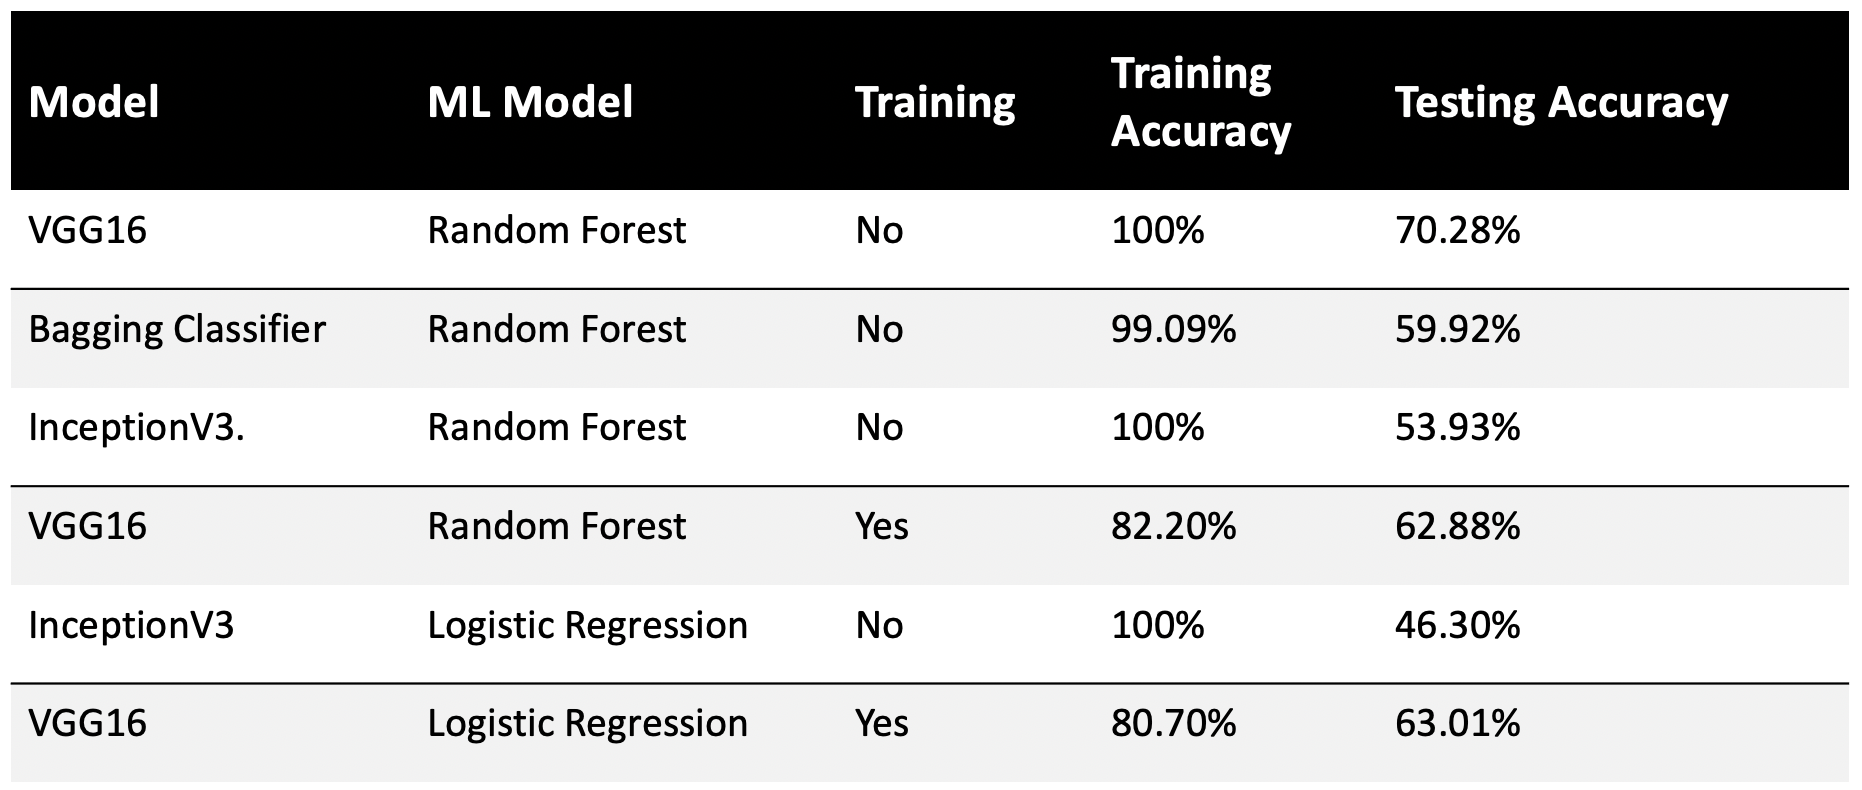

Our team conducted an initial analysis of several CNNs and ML algorithms to assess their accuracy on the training dataset, as outlined in Table 1. Initially, the VGG16, Bagging Classifier, and InceptionV3 CNN algorithms were executed without training, and their outputs were subsequently fed into the Random Forest ML model to generate accuracy results for both the training and testing sets. 

Notably, VGG16 achieved the highest performance, prompting us to pre-train it and utilize it in two separate ML models, Logistic regression and Random Forest. This preliminary analysis led to the conclusion that VGG16 served as the best baseline model among the three options.

## Section 3.2 – Deep Learning

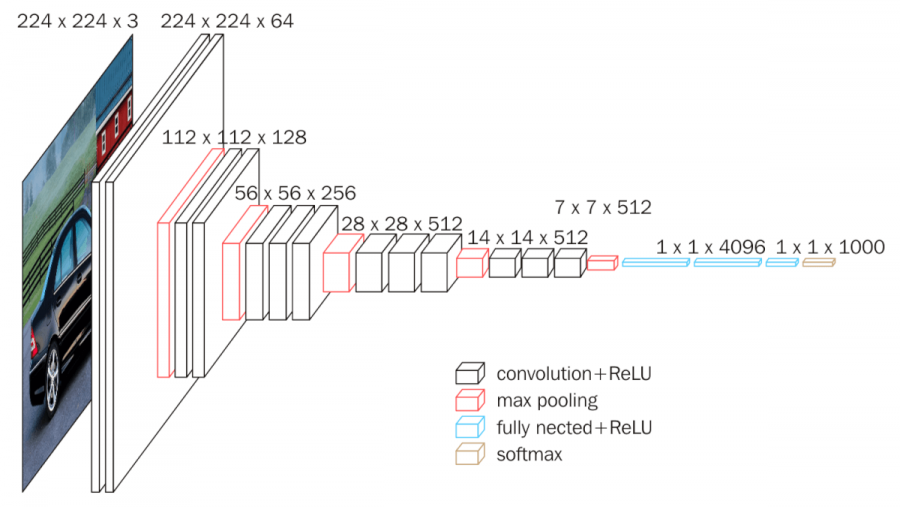

#### *Figure 1: VGG16 Architecture*

In order to optimize the performance of the model, we start by gaining an understanding of the VGG16 architecture and  techniques that can be implemented to mitigate overfitting in image classification problems. 

Running different epochs in a CNN or deep learning model affects its training accuracy, risk of overfitting, training time, and convergence. More epochs can improve training accuracy but increase the risk of overfitting. And as our team experienced, it can also require more computational resources and time. Some of the techiques used to reduce overfitting in image classification problems can be mitigated by:

 - Tuning Hyperparameters
 - Applying Regularization (L1 and L2 regularization, dropout, and batch normalization) 
 - Implementing Early Stopping
 - Using Data Augmentation
 - Simplifying Model Architecture
 
To elaborate, by fine-tuning hyperparameters (learning rate, batch size, and regularization strength), it can help find the optimal settings that minimize overfitting. By applying regularization it can help reduce overfitting by adding constraints to the model's parameters, promoting generalization. Implementing early stopping will monitoring the model's performance on a validation set during training and stopping the training process when the performance no longer increases.By reducing the complexity of the CNN model (decreasing the number of layers, filters, or units), it helps prevent overfitting when dealing with limited data.

The code below outlines a generalized process of how we structured our model to optimize the performance:

In [ ]:
from keras.applications.vgg16 import VGG16
from keras import regularizers, layers
from keras.models import Sequential
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Dense
from keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

NUM_EPOCHS = 100
keep_prob = 0.5
model_rate = 1-keep_prob
vggModel= tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

vggModel.trainable= False

model2 = tf.keras.models.Sequential()
model2.add(vggModel)
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=model_rate))
model2.add(tf.keras.layers.Dense(3, activation='softmax'))
# model2.add(tf.keras.layers.Dense(5, activation='softmax'))

print (model2.summary())

save_at = "/content/drive/MyDrive/Colab Notebooks/model2.hdf5"
save_best = ModelCheckpoint(save_at, monitor='val_accuracy', verbose=0, save_best_only=True, 
                            save_weights_only=False, mode='max')
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
               metrics=['accuracy'])

# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# patience early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
H2 = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test), 
               callbacks=[es, save_best])

model2 = load_model('/content/drive/MyDrive/Colab Notebooks/model2.hdf5')

# evaluate the model
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model2.evaluate(X_test, y_test, verbose=0)

## Section 3.3 – Results Evaluation

#### *Table 2: Optimizing Accuracy Results and Reducing Overfitting for VGG16 Model*

Initially, with a limited set of 8,000 augmented images, even after implementing the aforementioned methods to enhance performance, our results did not surpass 73% accuracy on the test set. However, upon expanding the augmented dataset to approximately over 21,000 images, a significant improvement in accuracy on the testing dataset became evident.

# Section 4: Conclusion

Our Car Damage Severity project aimed to develop a model that can accurately classify the severity of car damage based on images. Various machine learning algorithms, including Logistic Regression, Random Forest Classifier, Support Vector Machine, and Gradient Boosting Classifier, were trained and evaluated on the dataset.

The results showed that all four algorithms achieved a test accuracy of 80%, indicating a reasonable level of performance. The classification reports provided further insights into the precision, recall, and F1-score for each severity class. Overall, the models demonstrated decent performance across the different severity categories.

Data augmentation techniques were employed to enhance the training dataset by applying random rotations, shifts, shearing, zooming, flipping, and filling in empty pixels. This augmentation process aimed to improve the model's ability to generalize and accurately classify unseen car damage images.

Furthermore, dimensionality reduction techniques, such as LDA and t-SNE, were used to visualize the high-dimensional data. LDA helped extract discriminative features, while t-SNE provided insights into the local structure and relationships between the car damage instances.

In summary, the Car Damage Severity project successfully developed machine learning models capable of accurately classifying the severity of car damage. The models showcased reasonable performance, and the data augmentation techniques improved their ability to generalize. The inclusion of dimensionality reduction techniques facilitated data visualization and understanding of the underlying patterns and relationships.

Moving forward, further enhancements could be explored, such as fine-tuning the models, incorporating additional image preprocessing techniques, or considering alternative algorithms. These improvements may lead to even better performance and expand the practical applications of the Car Damage Severity model, such as in insurance claim processing, automotive safety systems, and vehicle maintenance.

# Section 7: References

    [1] Bhamere, P. (2022, December 31). *Car damage severity dataset*. Kaggle. Retrieved from https://www.kaggle.com/datasets/prajwalbhamere/car-damage-severity-dataset

    [2] Parra, D., & Gonzalez, A. E. (n.d.)*. Car damage assessment - UTRGV.* Retrieved April 6, 2023, from https://faculty.utrgv.edu/dongchul.kim/csci4352/spring2019/report/R11.pdf.

    [3] *A Complete Guide to Image Recognition. Nanonets. (n.d.).* Retrieved April 5, 2023, from https://nanonets.com/image-recognition